In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
file_path = r"C:\Users\ISMAIL\Downloads\archive (13)\powerconsumption.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


        Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4     

In [2]:
# Convert 'Date Time' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set 'Date Time' column as the index
df.set_index('Datetime', inplace=True)

# Resample the data to daily frequency
df_daily = df.resample('D').mean() 
# You can use 'sum' or other aggregation functions
# Display the first few rows of the DataFrame
print(df_daily.head())

            Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                             
2017-01-01     9.675299  68.519306   0.315146           121.390771   
2017-01-02    12.476875  71.456319   0.076563           120.404486   
2017-01-03    12.100000  74.981667   0.076715           120.686014   
2017-01-04    10.509479  75.459792   0.082417           122.959319   
2017-01-05    10.866444  71.040486   0.083896           118.749861   

            DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
Datetime                                                                   
2017-01-01     25.993924            28465.232067            17737.791287   
2017-01-02     27.227410            28869.493671            19557.725431   
2017-01-03     28.574660            30562.447257            20057.269504   
2017-01-04     28.827222            30689.831224            20102.077001   
2017-01-05     29.741437            30802.911393     

In [3]:
# Summary statistics of the numerical columns
print(df_daily.describe())



# Plot temperature, humidity, wind speed, and other relevant features
df_daily[['Temperature', 'Humidity', 'WindSpeed']].plot(figsize=(12, 6))
plt.xlabel('Date Time')
plt.ylabel('Values')
plt.title('Weather Features Over Time')
plt.show()

# Check for missing values
missing_values = df_daily.isnull().sum()
print(missing_values)

       Temperature    Humidity   WindSpeed  GeneralDiffuseFlows  DiffuseFlows  \
count   364.000000  364.000000  364.000000           364.000000    364.000000   
mean     18.810024   68.259518    1.959489           182.696614     75.028022   
std       5.201380   11.506292    2.203759            86.162320     38.682380   
min       8.627868   29.359861    0.064431            26.444944     19.250424   
25%      14.196771   60.025174    0.080561           113.057799     44.595582   
50%      19.085174   70.271111    0.236771           166.299003     67.660028   
75%      22.872292   76.936563    4.907153           264.700498     97.551215   
max      32.428958   89.585417    4.930493           335.065701    209.134222   

       PowerConsumption_Zone1  PowerConsumption_Zone2  PowerConsumption_Zone3  
count              364.000000              364.000000              364.000000  
mean             32344.970564            21042.509082            17835.406218  
std               2669.367965 

Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64


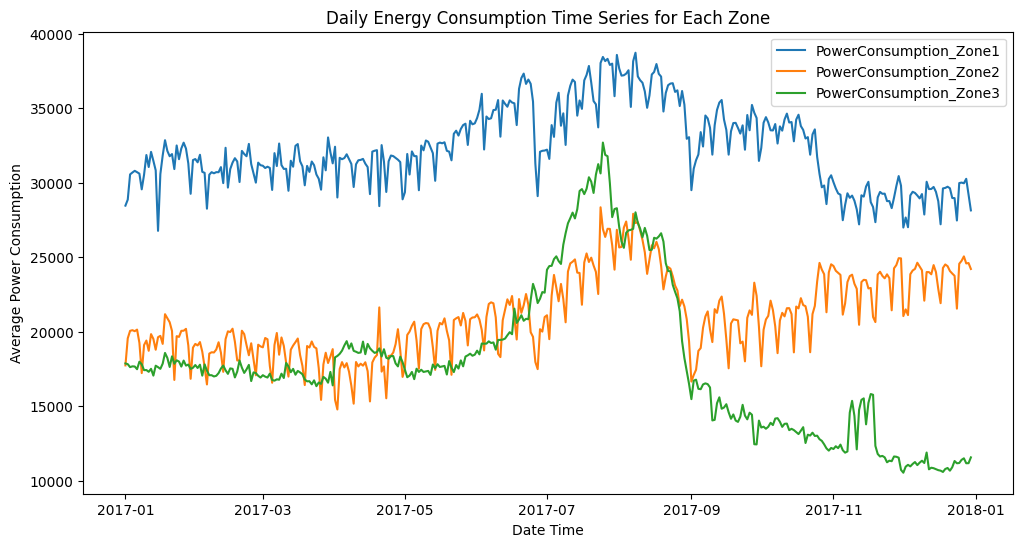

In [4]:
# Plot the energy consumption time series for each zone on a daily basis
plt.figure(figsize=(12, 6))
for zone in ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']:
    plt.plot(df_daily.index, df_daily[zone], label=zone)
plt.xlabel('Date Time')
plt.ylabel('Average Power Consumption')
plt.title('Daily Energy Consumption Time Series for Each Zone')
plt.legend()
plt.show()

In [5]:
# Create day of the week, month, and year features
df_daily['DayOfWeek'] = df_daily.index.dayofweek  # Monday is 0 and Sunday is 6
df_daily['Month'] = df_daily.index.month
df_daily['Year'] = df_daily.index.year

# Display the updated DataFrame
print(df_daily.head())


            Temperature   Humidity  WindSpeed  GeneralDiffuseFlows  \
Datetime                                                             
2017-01-01     9.675299  68.519306   0.315146           121.390771   
2017-01-02    12.476875  71.456319   0.076563           120.404486   
2017-01-03    12.100000  74.981667   0.076715           120.686014   
2017-01-04    10.509479  75.459792   0.082417           122.959319   
2017-01-05    10.866444  71.040486   0.083896           118.749861   

            DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
Datetime                                                                   
2017-01-01     25.993924            28465.232067            17737.791287   
2017-01-02     27.227410            28869.493671            19557.725431   
2017-01-03     28.574660            30562.447257            20057.269504   
2017-01-04     28.827222            30689.831224            20102.077001   
2017-01-05     29.741437            30802.911393     

In [6]:
import plotly.express as px

# Assuming you have already created the 'DayOfWeek', 'Month', and 'Year' features

# Interactive line plot for daily energy consumption over time
fig1 = px.line(df_daily, x=df_daily.index, y='PowerConsumption_Zone1', title='Daily Energy Consumption - Zone 1')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Energy Consumption')

# Interactive box plot for energy consumption across days of the week
fig2 = px.box(df_daily, x='DayOfWeek', y='PowerConsumption_Zone1', title='Energy Consumption by Day of Week')
fig2.update_xaxes(title_text='Day of Week')
fig2.update_yaxes(title_text='Energy Consumption')

# Interactive bar plot for energy consumption across months
fig3 = px.bar(df_daily, x='Month', y='PowerConsumption_Zone1', title='Energy Consumption by Month')
fig3.update_xaxes(title_text='Month')
fig3.update_yaxes(title_text='Energy Consumption')

# Interactive bar plot for energy consumption across years
fig4 = px.bar(df_daily, x='Year', y='PowerConsumption_Zone1', title='Energy Consumption by Year')
fig4.update_xaxes(title_text='Year')
fig4.update_yaxes(title_text='Energy Consumption')

# Display the interactive plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()

fig1 = px.line(df_daily, x=df_daily.index, y='PowerConsumption_Zone2', title='Daily Energy Consumption - Zone 1')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Energy Consumption')

# Interactive box plot for energy consumption across days of the week
fig2 = px.box(df_daily, x='DayOfWeek', y='PowerConsumption_Zone2', title='Energy Consumption by Day of Week')
fig2.update_xaxes(title_text='Day of Week')
fig2.update_yaxes(title_text='Energy Consumption')

# Interactive bar plot for energy consumption across months
fig3 = px.bar(df_daily, x='Month', y='PowerConsumption_Zone2', title='Energy Consumption by Month')
fig3.update_xaxes(title_text='Month')
fig3.update_yaxes(title_text='Energy Consumption')

# Interactive bar plot for energy consumption across years
fig4 = px.bar(df_daily, x='Year', y='PowerConsumption_Zone2', title='Energy Consumption by Year')
fig4.update_xaxes(title_text='Year')
fig4.update_yaxes(title_text='Energy Consumption')

# Display the interactive plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()

fig1 = px.line(df_daily, x=df_daily.index, y='PowerConsumption_Zone3', title='Daily Energy Consumption - Zone 1')
fig1.update_xaxes(title_text='Date')
fig1.update_yaxes(title_text='Energy Consumption')

# Interactive box plot for energy consumption across days of the week
fig2 = px.box(df_daily, x='DayOfWeek', y='PowerConsumption_Zone3', title='Energy Consumption by Day of Week')
fig2.update_xaxes(title_text='Day of Week')
fig2.update_yaxes(title_text='Energy Consumption')

# Interactive bar plot for energy consumption across months
fig3 = px.bar(df_daily, x='Month', y='PowerConsumption_Zone3', title='Energy Consumption by Month')
fig3.update_xaxes(title_text='Month')
fig3.update_yaxes(title_text='Energy Consumption')

# Interactive bar plot for energy consumption across years
fig4 = px.bar(df_daily, x='Year', y='PowerConsumption_Zone3', title='Energy Consumption by Year')
fig4.update_xaxes(title_text='Year')
fig4.update_yaxes(title_text='Energy Consumption')

# Display the interactive plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()


In [7]:
# Interactive scatter plot for temperature vs. energy consumption
fig_temp = px.scatter(df_daily, x='Temperature', y='PowerConsumption_Zone1', title='Temperature vs. Energy Consumption Zone1')
fig_temp.update_xaxes(title_text='Temperature')
fig_temp.update_yaxes(title_text='Energy Consumption')

# Interactive scatter plot for humidity vs. energy consumption
fig_humidity = px.scatter(df_daily, x='Humidity', y='PowerConsumption_Zone1', title='Humidity vs. Energy Consumption Zone1')
fig_humidity.update_xaxes(title_text='Humidity')
fig_humidity.update_yaxes(title_text='Energy Consumption')

# Interactive scatter plot for wind speed vs. energy consumption
fig_wind = px.scatter(df_daily, x='WindSpeed', y='PowerConsumption_Zone1', title='Wind Speed vs. Energy Consumption Zone1')
fig_wind.update_xaxes(title_text='Wind Speed')
fig_wind.update_yaxes(title_text='Energy Consumption')

# Display the interactive plots
fig_temp.show()
fig_humidity.show()
fig_wind.show()

# Interactive scatter plot for temperature vs. energy consumption
fig_temp = px.scatter(df_daily, x='Temperature', y='PowerConsumption_Zone2', title='Temperature vs. Energy ConsumptionZone 2')
fig_temp.update_xaxes(title_text='Temperature')
fig_temp.update_yaxes(title_text='Energy Consumption')

# Interactive scatter plot for humidity vs. energy consumption
fig_humidity = px.scatter(df_daily, x='Humidity', y='PowerConsumption_Zone2', title='Humidity vs. Energy Consumption Zone 2')
fig_humidity.update_xaxes(title_text='Humidity')
fig_humidity.update_yaxes(title_text='Energy Consumption')

# Interactive scatter plot for wind speed vs. energy consumption
fig_wind = px.scatter(df_daily, x='WindSpeed', y='PowerConsumption_Zone2', title='Wind Speed vs. Energy Consumption Zone 2' )
fig_wind.update_xaxes(title_text='Wind Speed')
fig_wind.update_yaxes(title_text='Energy Consumption')

# Display the interactive plots
fig_temp.show()
fig_humidity.show()
fig_wind.show()

# Interactive scatter plot for temperature vs. energy consumption
fig_temp = px.scatter(df_daily, x='Temperature', y='PowerConsumption_Zone3', title='Temperature vs. Energy Consumption Zone 3')
fig_temp.update_xaxes(title_text='Temperature')
fig_temp.update_yaxes(title_text='Energy Consumption')

# Interactive scatter plot for humidity vs. energy consumption
fig_humidity = px.scatter(df_daily, x='Humidity', y='PowerConsumption_Zone3', title='Humidity vs. Energy Consumption Zone 3')
fig_humidity.update_xaxes(title_text='Humidity')
fig_humidity.update_yaxes(title_text='Energy Consumption')

# Interactive scatter plot for wind speed vs. energy consumption
fig_wind = px.scatter(df_daily, x='WindSpeed', y='PowerConsumption_Zone3', title='Wind Speed vs. Energy Consumption Zone 3')
fig_wind.update_xaxes(title_text='Wind Speed')
fig_wind.update_yaxes(title_text='Energy Consumption')

# Display the interactive plots
fig_temp.show()
fig_humidity.show()
fig_wind.show()

In [8]:
import seaborn as sns
# Define the weather features and consumption zones
weather_features = ['Temperature', 'Humidity', 'WindSpeed']
consumption_zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Calculate correlations
correlation_matrix = df_daily[weather_features + consumption_zones].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [9]:
#!pip install statsmodels

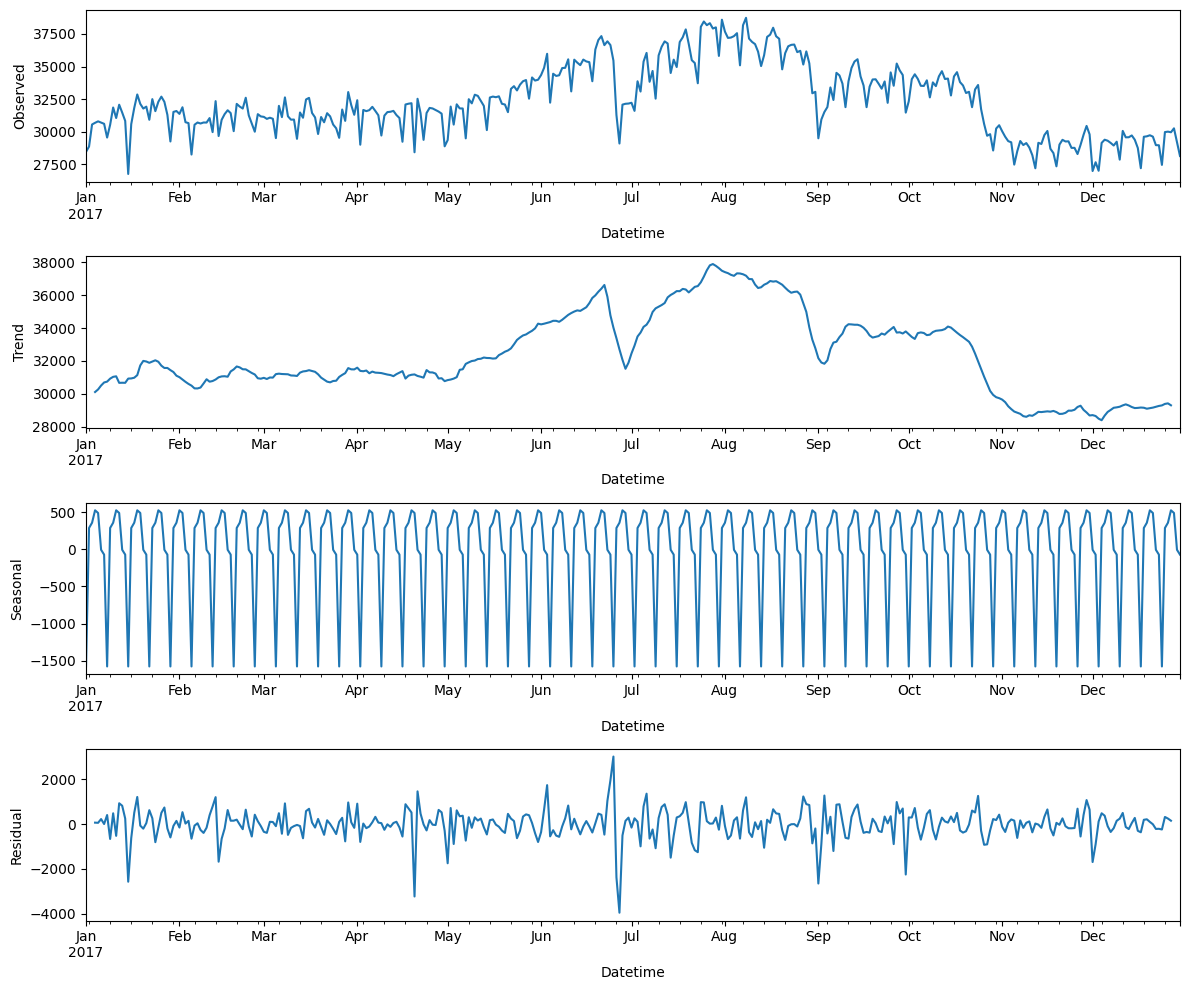

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition for Zone 1 Power Consumption
result = seasonal_decompose(df_daily['PowerConsumption_Zone1'], model='additive')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(result.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of Energy Consumption (Zone 1)')
plt.show()

In [12]:
monthly_averages = df_daily.resample('M').mean()


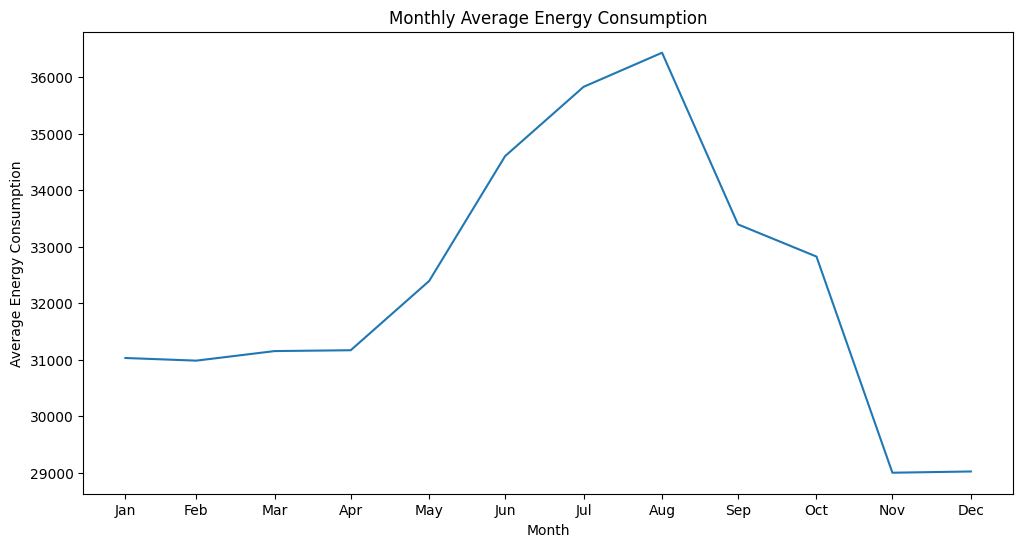

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_averages.index, monthly_averages['PowerConsumption_Zone1'])
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption')
plt.title('Monthly Average Energy Consumption')
plt.xticks(monthly_averages.index, monthly_averages.index.strftime('%b'))
plt.show()


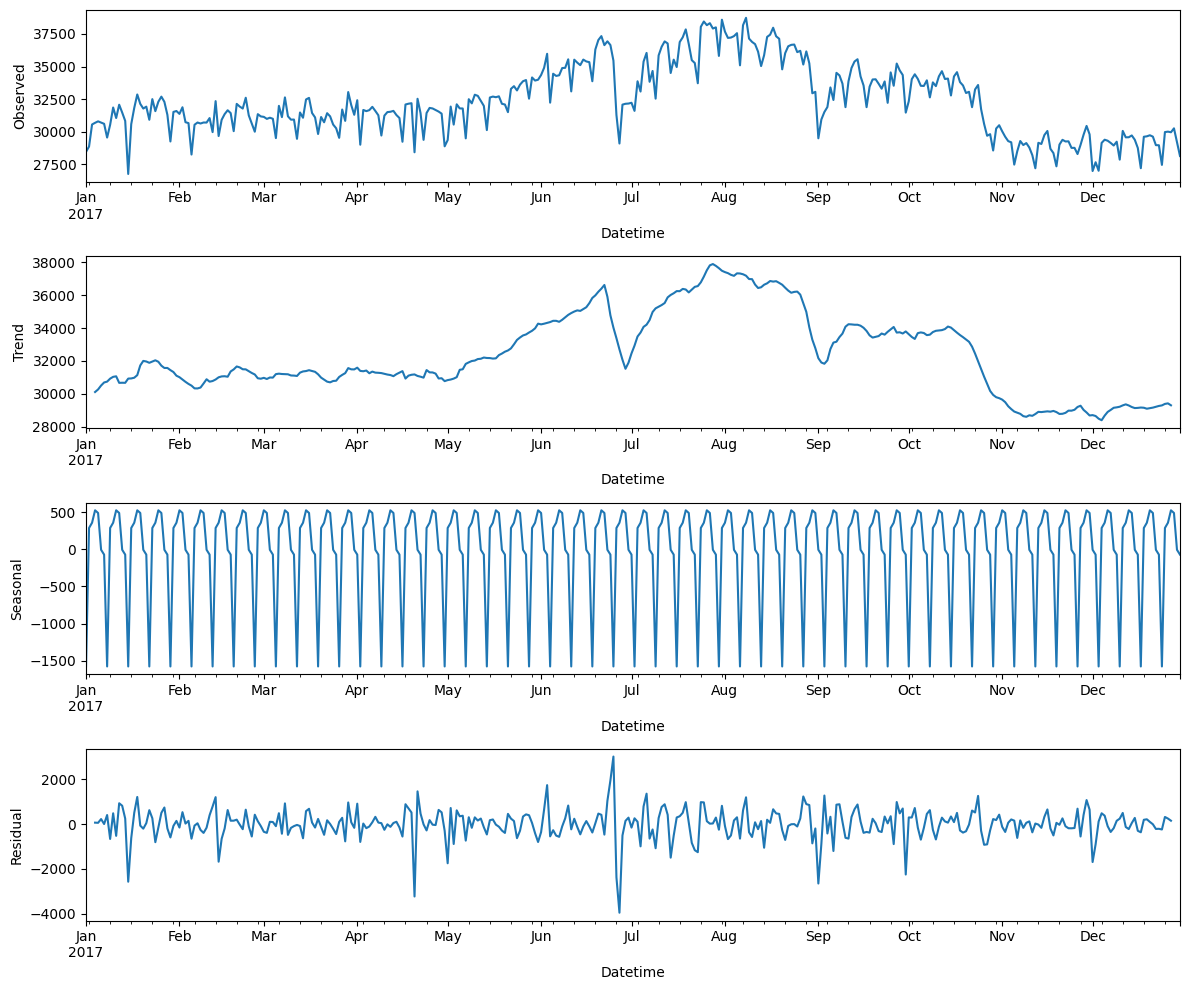

In [14]:
# Perform time series decomposition for Zone 2 Power Consumption
result2 = seasonal_decompose(df_daily['PowerConsumption_Zone2'], model='additive')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

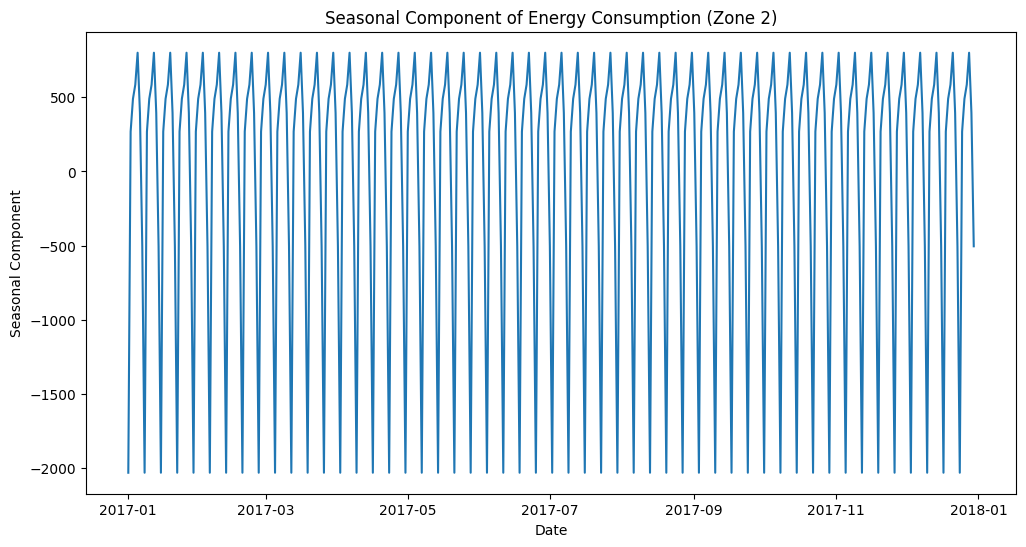

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(result2.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Component of Energy Consumption (Zone 2)')
plt.show()



In [16]:
monthly_averages = df_daily.resample('M').mean()

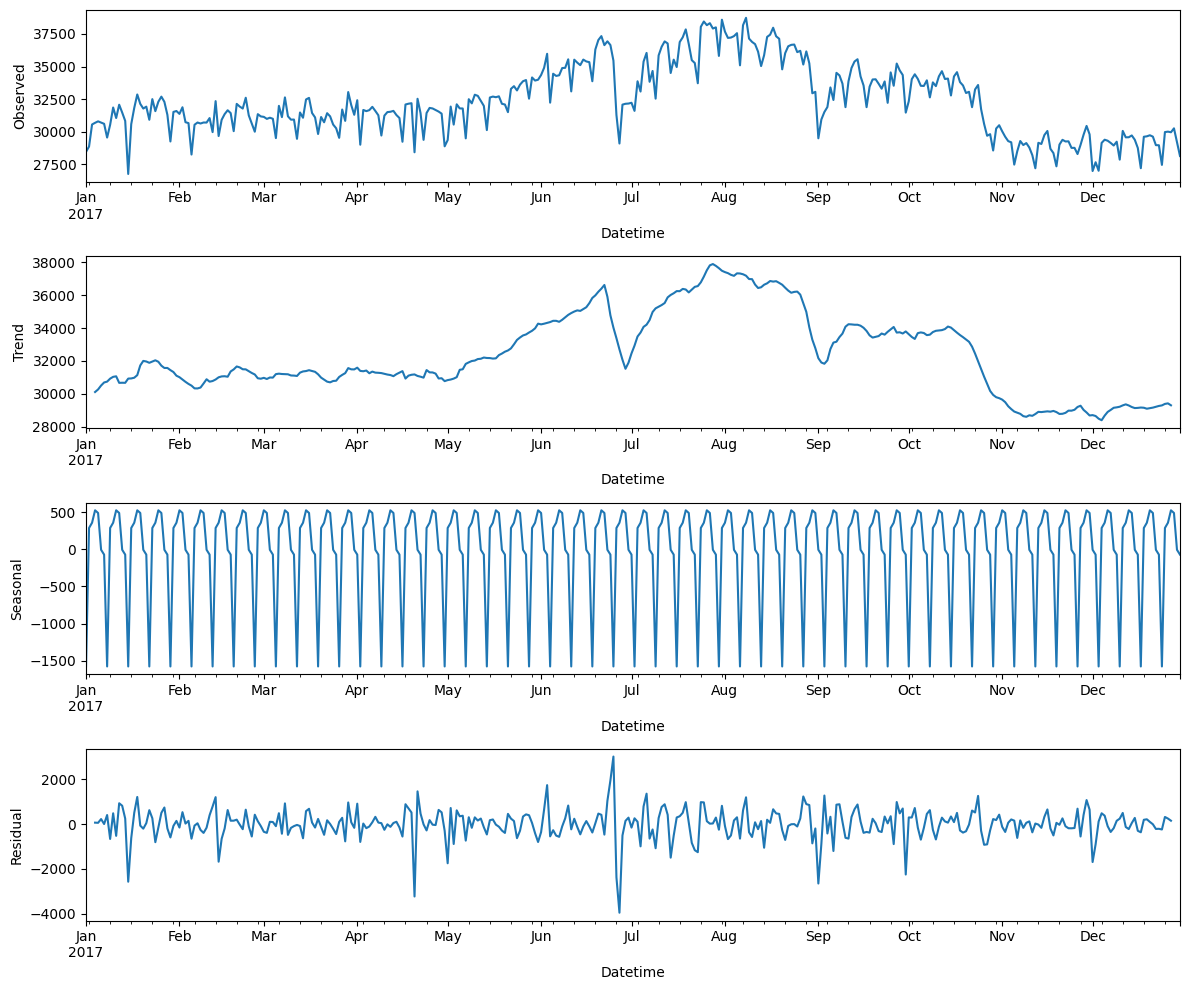

In [17]:
# Perform time series decomposition for Zone 3 Power Consumption
result3 = seasonal_decompose(df_daily['PowerConsumption_Zone3'], model='additive')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [18]:
#Monthly Average energy sonsumption for each month to identify deeper trends or patterns
monthly_averages = df_daily.resample('M').mean()


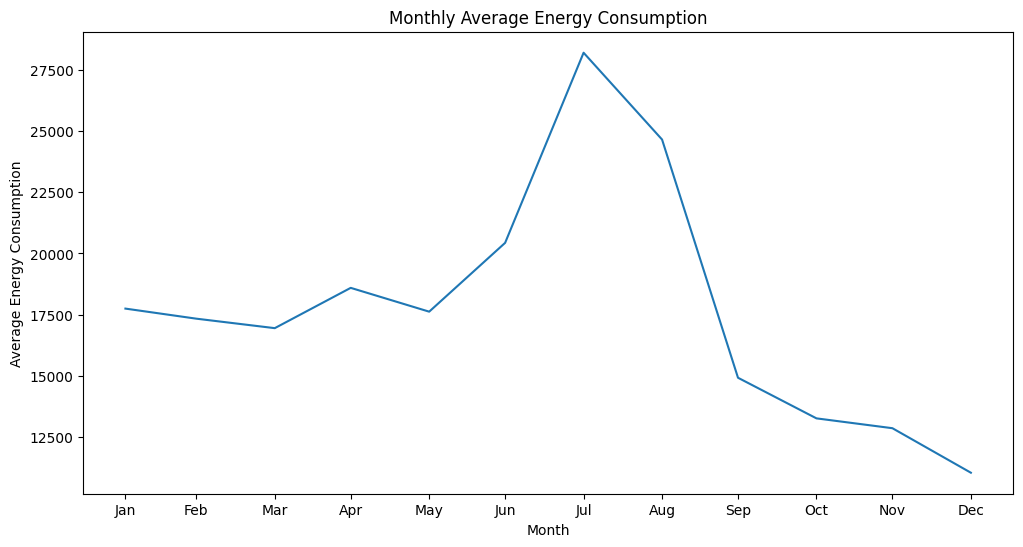

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_averages.index, monthly_averages['PowerConsumption_Zone3'])
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption')
plt.title('Monthly Average Energy Consumption')
plt.xticks(monthly_averages.index, monthly_averages.index.strftime('%b'))
plt.show()


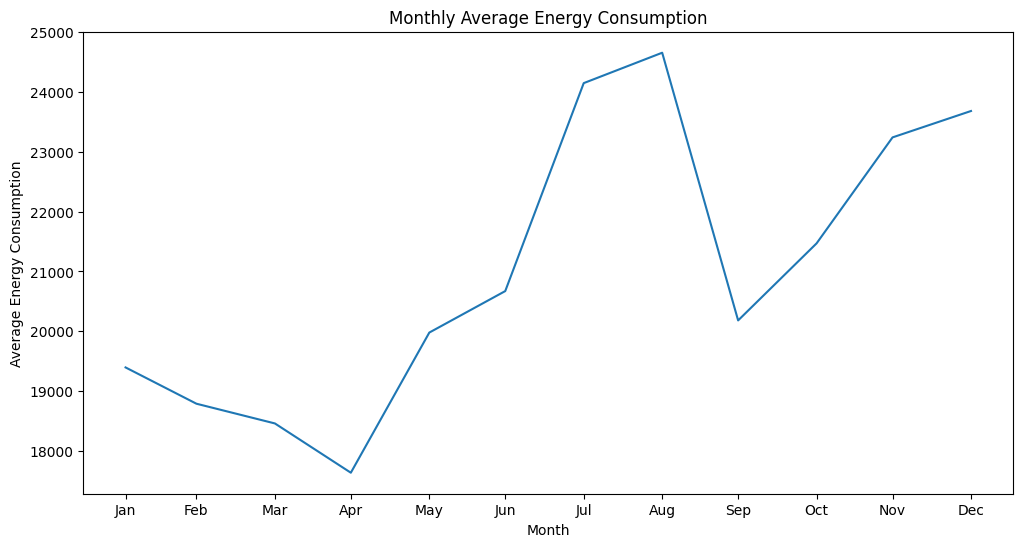

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_averages.index, monthly_averages['PowerConsumption_Zone2'])
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption')
plt.title('Monthly Average Energy Consumption')
plt.xticks(monthly_averages.index, monthly_averages.index.strftime('%b'))
plt.show()


# Zone 1:

Consistently around 31000 from January to March.
Gradually ascending from April to August, peaking at around 36000.
Gradual descent from August to November.
Maintains a consistent level from November to December.

# Zone 2:

Starts around 19000 in January.
Declines until April, reaching below 18000.
Ascends from May to August, peaking at above 24000.
Declines again in September.
Climbs back up until December.

# Zone 3:

Starts around 17500 in January.
Fluctuates around 17500 to almost 18000 until April.
Ascends from May to July, peaking around 27500.
Descends steeply from July to September, reaching 15000.
Declines further until December.

In [21]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2017-01-01 to 2017-12-30
Freq: D
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             364 non-null    float64
 1   Humidity                364 non-null    float64
 2   WindSpeed               364 non-null    float64
 3   GeneralDiffuseFlows     364 non-null    float64
 4   DiffuseFlows            364 non-null    float64
 5   PowerConsumption_Zone1  364 non-null    float64
 6   PowerConsumption_Zone2  364 non-null    float64
 7   PowerConsumption_Zone3  364 non-null    float64
 8   DayOfWeek               364 non-null    int32  
 9   Month                   364 non-null    int32  
 10  Year                    364 non-null    int32  
dtypes: float64(8), int32(3)
memory usage: 29.9 KB


In [22]:
from statsmodels.tsa.stattools import adfuller

import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Load the preprocessed data into df_daily

# Perform ADF test for each power consumption zone
zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

for zone in zones:
    result = adfuller(df_daily[zone])
    p_value = result[1]

    print(f"ADF Test Results for {zone}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {p_value}")
    
    if p_value <= 0.05:
        print("The data is likely stationary.")
    else:
        print("The data is likely non-stationary.")
    
    print("\n")



ADF Test Results for PowerConsumption_Zone1:
ADF Statistic: -1.5591473246082646
P-value: 0.5040758794686803
The data is likely non-stationary.


ADF Test Results for PowerConsumption_Zone2:
ADF Statistic: -1.5255067262811692
P-value: 0.520857920265453
The data is likely non-stationary.


ADF Test Results for PowerConsumption_Zone3:
ADF Statistic: -1.4997942779922733
P-value: 0.5336131041904734
The data is likely non-stationary.




In [23]:
from statsmodels.tsa.stattools import adfuller

# List of power consumption columns
power_consumption_columns = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Perform ADF test for each power consumption column
for column_to_test in power_consumption_columns:
    result = adfuller(df_daily[column_to_test])
    p_value = result[1]

    print(f"ADF Test Results for {column_to_test}:")
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {p_value}")
    
    if p_value <= 0.05:
        print("The data is likely stationary.")
    else:
        print("The data is likely non-stationary.")
    
    print("\n")

# Apply differencing to make the data stationary
for column_to_difference in power_consumption_columns:
    df_daily[column_to_difference + '_diff'] = df_daily[column_to_difference].diff()

# Perform ADF test on the differenced data
for column_to_test in [column + '_diff' for column in power_consumption_columns]:
    result = adfuller(df_daily[column_to_test].dropna())
    p_value = result[1]

    print(f"ADF Test Results for {column_to_test} (Differenced Data):")
    print(f"ADF Statistic: {result[0]}")
    print(f"P-value: {p_value}")
    
    if p_value <= 0.05:
        print("The differenced data is likely stationary.")
    else:
        print("The differenced data is likely non-stationary.")
    
    print("\n")


ADF Test Results for PowerConsumption_Zone1:
ADF Statistic: -1.5591473246082646
P-value: 0.5040758794686803
The data is likely non-stationary.


ADF Test Results for PowerConsumption_Zone2:
ADF Statistic: -1.5255067262811692
P-value: 0.520857920265453
The data is likely non-stationary.


ADF Test Results for PowerConsumption_Zone3:
ADF Statistic: -1.4997942779922733
P-value: 0.5336131041904734
The data is likely non-stationary.


ADF Test Results for PowerConsumption_Zone1_diff (Differenced Data):
ADF Statistic: -5.522772901648943
P-value: 1.8614887838513053e-06
The differenced data is likely stationary.


ADF Test Results for PowerConsumption_Zone2_diff (Differenced Data):
ADF Statistic: -4.879325346016332
P-value: 3.8254141412400314e-05
The differenced data is likely stationary.


ADF Test Results for PowerConsumption_Zone3_diff (Differenced Data):
ADF Statistic: -4.020463480112694
P-value: 0.0013070686862344152
The differenced data is likely stationary.




C:\Users\ISMAIL\Documents\Github_Folder\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



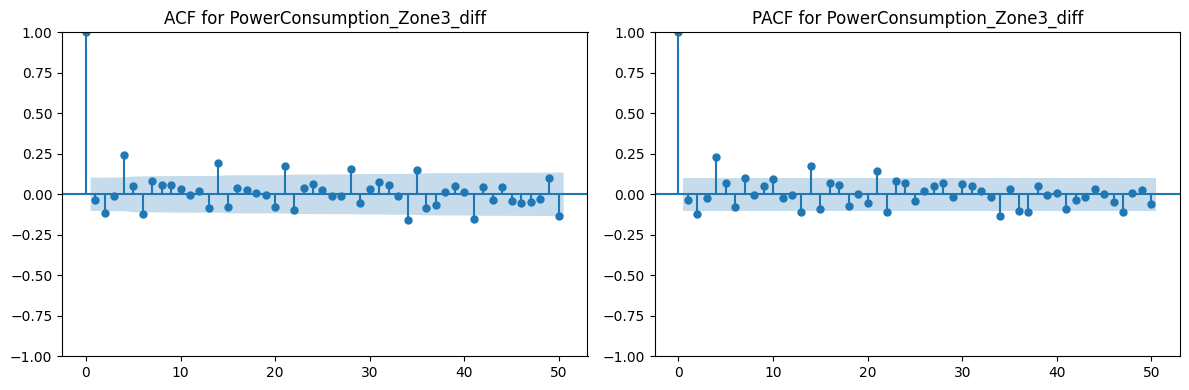

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for each differenced power consumption column
for column_to_test in [column + '_diff' for column in power_consumption_columns]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(df_daily[column_to_test].dropna(), ax=axes[0], lags=50)
    plot_pacf(df_daily[column_to_test].dropna(), ax=axes[1], lags=50)
    axes[0].set_title(f'ACF for {column_to_test}')
    axes[1].set_title(f'PACF for {column_to_test}')
    plt.tight_layout()
    plt.show()


C:\Users\ISMAIL\Documents\Github_Folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\ISMAIL\Documents\Github_Folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\ISMAIL\Documents\Github_Folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Root Mean Squared Error: 635.0454075312497


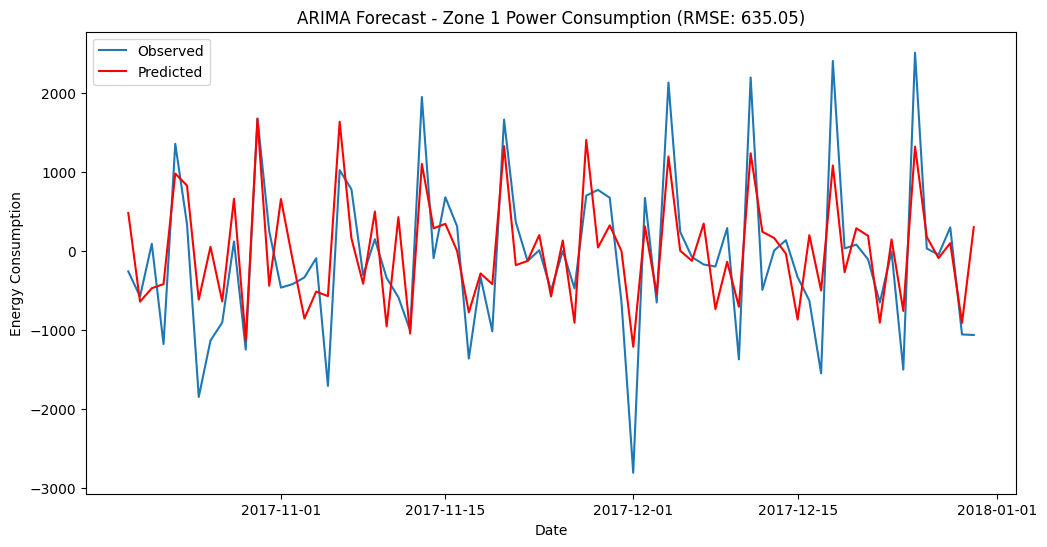

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming you have already preprocessed your data and loaded it into df_stationary
# Assuming your target column is 'PowerConsumption_Zone1'

# Train-test split (80% training data, 20% testing data)
train_size = int(len(df_daily) * 0.8)
train, test = df_daily[:train_size], df_daily[train_size:]

# Fit the ARIMA model
order = (21, 1,27) # Replace p, d, q with appropriate values
model = ARIMA(train['PowerConsumption_Zone1_diff'], order=order)
model_fit = model.fit()

# Make predictions
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)  # Only forecasted values

# Calculate RMSE (Root Mean Squared Error) for evaluation
rmse = sqrt(mean_squared_error(test['PowerConsumption_Zone1_diff'], forecast))
print(f"Root Mean Squared Error: {rmse}")

# Use the calculated RMSE in your code
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['PowerConsumption_Zone1_diff'], label='Observed')
plt.plot(test.index, forecast, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title(f'ARIMA Forecast - Zone 1 Power Consumption (RMSE: {rmse:.2f})')  # Use rmse in title
plt.legend()
plt.show()


In [26]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming you have the actual test data in 'test_data' and the predicted values in 'predictions'
actual_values = test['PowerConsumption_Zone1_diff']
predictions = forecast  # Replace with your predicted values

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(actual_values, predictions)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(actual_values, predictions))

# Calculate MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual_values - predictions) / actual_values)) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 512.78
Root Mean Squared Error (RMSE): 635.05
Mean Absolute Percentage Error (MAPE): 291.36%


C:\Users\ISMAIL\Documents\Github_Folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

C:\Users\ISMAIL\Documents\Github_Folder\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\ISMAIL\Documents\Github_Folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



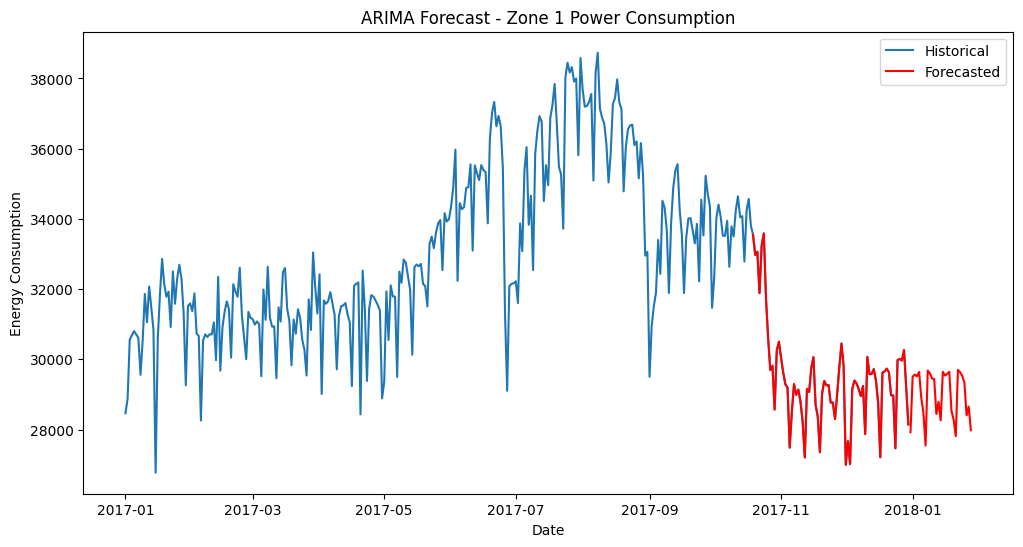

In [27]:
# Retrain the ARIMA model on the entire dataset
model_fit = ARIMA(df_daily['PowerConsumption_Zone1_diff'], order=order).fit()

# Number of future time steps to predict
future_steps = 30  # Adjust according to your needs

# Generate predictions for future time steps
forecast = model_fit.forecast(steps=future_steps)

# Combine historical test set with forecasted values
historical_and_forecast = pd.concat([test['PowerConsumption_Zone1_diff'], pd.Series(forecast, index=pd.date_range(start=test.index[-1], periods=future_steps, freq='D'))])

# Convert back to actual energy consumption values (reverse differencing)
forecast_energy_consumption = historical_and_forecast.cumsum() + df_daily['PowerConsumption_Zone1'].iloc[train_size - 1]

# Plot historical data and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df_daily.index, df_daily['PowerConsumption_Zone1'], label='Historical')
plt.plot(forecast_energy_consumption.index, forecast_energy_consumption, label='Forecasted', color='red')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('ARIMA Forecast - Zone 1 Power Consumption')
plt.legend()
plt.show()


In [28]:
#!pip install prophet


In [29]:
from prophet import Prophet

df_prophet = df_daily.reset_index()[['Datetime', 'PowerConsumption_Zone1']]
df_prophet.columns = ['ds', 'y']


In [30]:
# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df_prophet)


16:49:29 - cmdstanpy - INFO - Chain [1] start processing
16:49:30 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# Create a DataFrame with future dates
future = model.make_future_dataframe(periods=365)  # Adjust the number of periods as needed

# Generate predictions for the future dates
forecast = model.predict(future)


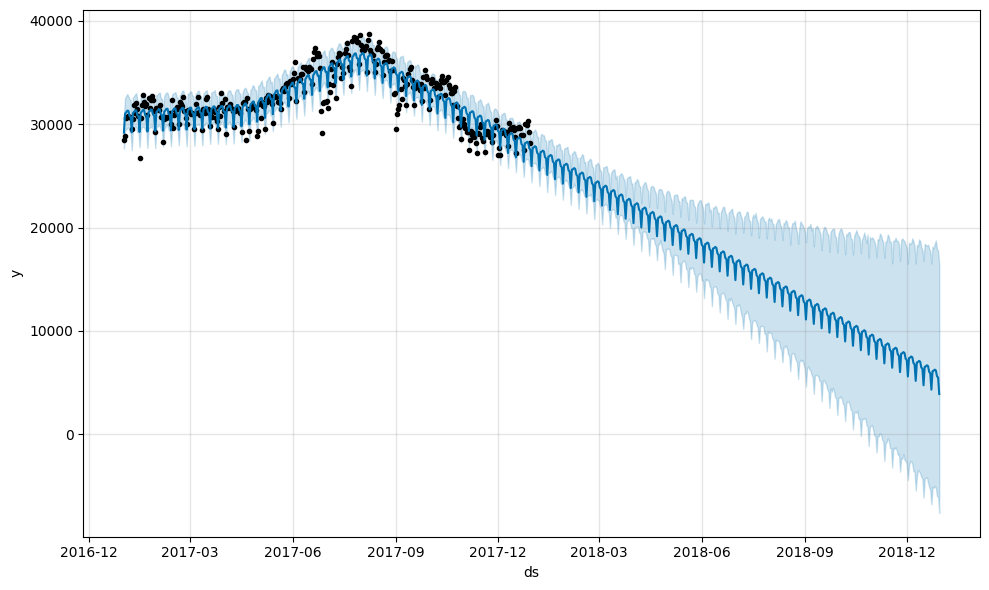

In [32]:
# Plot the forecast and components
fig = model.plot(forecast)


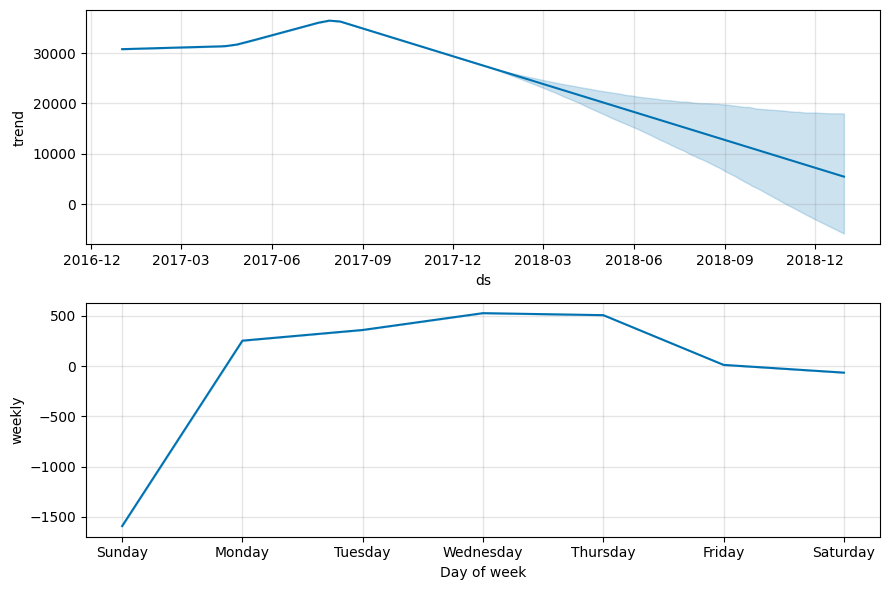

In [33]:
fig = model.plot_components(forecast)
